In [35]:
#import dependencies
import ipynb
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import *

# import clean dataframe from main file
from ipynb.fs.full.emissions_analysis import main_df
main_df
main_df.columns

Index(['Country', 'Year', 'Savanna fires', 'Forest fires', 'Crop Residues',
       'Rice Cultivation', 'Drained organic soils (CO2)',
       'Pesticides Manufacturing', 'Food Transport', 'Forestland',
       'Net Forest conversion', 'Food Household Consumption', 'Food Retail',
       'On-farm Electricity Use', 'Food Packaging',
       'Agrifood Systems Waste Disposal', 'Food Processing',
       'Fertilizers Manufacturing', 'IPPU', 'Manure applied to Soils',
       'Manure left on Pasture', 'Manure Management', 'Fires in organic soils',
       'Fires in humid tropical forests', 'On-farm energy use',
       'Rural population', 'Urban population', 'Total Population - Male',
       'Total Population - Female', 'total_emission', 'Average Temperature °C',
       'rice_yield'],
      dtype='object')

In [36]:
# select only the needed columns
df = main_df[['Country'
              , 'Year'
              , 'Rural population'
              , 'Urban population'
              , 'Total Population - Male'
              , 'Total Population - Female'
              , 'total_emission'
              , 'Average Temperature °C']]

#add male and female population to get total pop
df['Total Population'] = (df['Total Population - Male'] 
                          + df['Total Population - Female'])

#rename temperature col
df = df.rename(columns={'Average Temperature °C': 'Avg Temp C'})

df = df.dropna()
df.head()
df.describe()

C:\Users\nmizz\AppData\Local\Temp\ipykernel_12756\1117825713.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total Population'] = (df['Total Population - Male']


,Year,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Avg Temp C,Total Population
count,6965.000000,6.965000e+03,6.965000e+03,6.965000e+03,6.965000e+03,6.965000e+03,6965.000000,6.965000e+03
mean,2005.124910,1.785774e+07,1.693230e+07,1.761963e+07,1.732447e+07,6.409124e+04,0.872989,3.494410e+07
std,8.894665,8.901521e+07,6.574362e+07,7.603993e+07,7.251711e+07,2.283130e+05,0.555930,1.485462e+08
min,1990.000000,0.000000e+00,0.000000e+00,2.500000e+02,2.700000e+02,-3.918841e+05,-1.415833,5.200000e+02
25%,1997.000000,9.731100e+04,2.173860e+05,2.013260e+05,2.078900e+05,5.221244e+03,0.511333,4.081450e+05
50%,2005.000000,1.595322e+06,2.357581e+06,2.469660e+06,2.444135e+06,1.214765e+04,0.834300,4.895243e+06
75%,2013.000000,8.177340e+06,8.277123e+06,9.075924e+06,9.112588e+06,3.513973e+04,1.206750,1.817757e+07
max,2020.000000,9.000991e+08,9.020778e+08,7.435866e+08,7.133419e+08,3.115114e+06,3.558083,1.456928e+09


## Research Question: How do Co2 Levels change as population changes?

Strategy: Create two scatter plots with regression lines. 

1. X = population, Y = Total emissions
2. X = population, Y = Temperature

Population will be the independent variable because we assume that changes in population influence temperature and population

# CO2 Levels and Population Change

In [37]:
#group df by country, take the average of all years in the sample
df_grouped = df.groupby(by='Country')

df_by_country = pd.DataFrame()
df_by_country['Total Population'] = df_grouped['Total Population'].mean()
df_by_country['Total Population - Female'] = df_grouped['Total Population - Female'].mean()
df_by_country['Total Population - Male'] = df_grouped['Total Population - Male'].mean()
df_by_country['Total Emissions'] = df_grouped['total_emission'].mean()
df_by_country['Avg Temp C'] = df_grouped['Avg Temp C'].mean()

In [38]:
#create function for regression plotting
# Define a function to create Linear Regression plots
def regress(x, y, xlabel, ylabel, chart_title):
    regression = linregress(x,y)
    plt.plot(x, y, 'o', label='Data')
    plt.plot(x, regression.intercept + regression.slope * x, label='Line of Best Fit')
    plt.legend()
    plt.title(chart_title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    m = regression.slope
    b = regression.intercept
    plt.figtext(x=0, y=0, s=f'Y = {m}X + {b}')
    plt.show()

    rvalue = regression.rvalue
    pvalue = regression.pvalue
    print(f"rvalue = {rvalue}\npvalue = {pvalue}")

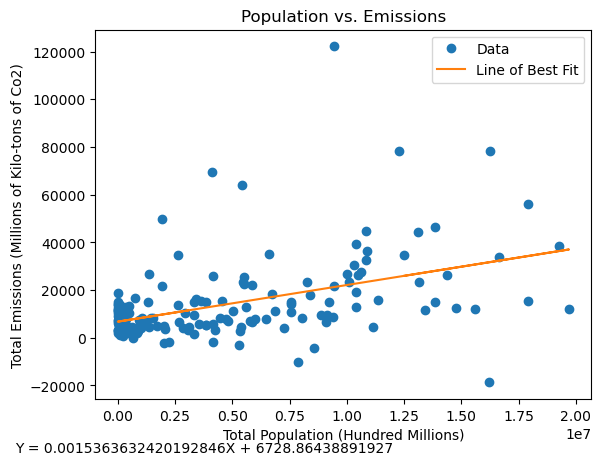

rvalue = 0.4612241691345029
pvalue = 1.0427213901304365e-10


In [39]:
#remove outlier values
df_by_country_2 = df_by_country.loc[(df_by_country['Total Population'] <= 20000000) & (df_by_country['Total Emissions'] <= 500000)]

x = df_by_country_2['Total Population']
y = df_by_country_2['Total Emissions']
xlabel = 'Total Population (Hundred Millions)'
ylabel = 'Total Emissions (Millions of Kilo-tons of Co2)'
chart_title = 'Population vs. Emissions'

regress(x, y, xlabel, ylabel, chart_title)


Interpretation of the results:

There is a strong positive linear relationship between the average population and average total emissions by country during the period of 1990 - 2020. In other words, as population increases, total emissions tend to increase at a rate of 1.2 tons (0.0012 Kilo-Tons) of Co2 per person, per year.

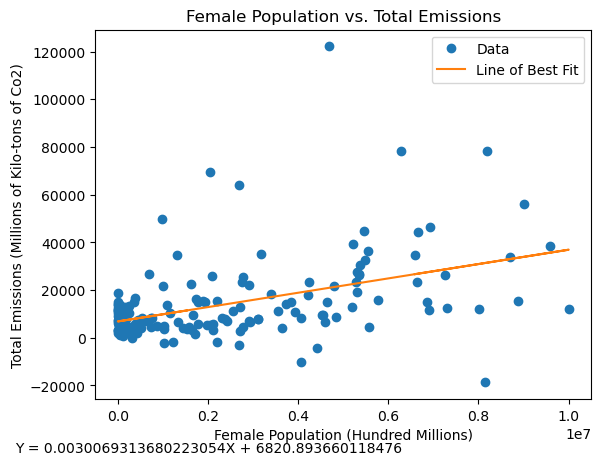

rvalue = 0.4576101628564279
pvalue = 1.5183312647759363e-10


In [40]:
x = df_by_country_2['Total Population - Female']
y = df_by_country_2['Total Emissions']
xlabel = 'Female Population (Hundred Millions)'
ylabel = 'Total Emissions (Millions of Kilo-tons of Co2)'
chart_title = 'Female Population vs. Total Emissions'

regress(x, y, xlabel, ylabel, chart_title)

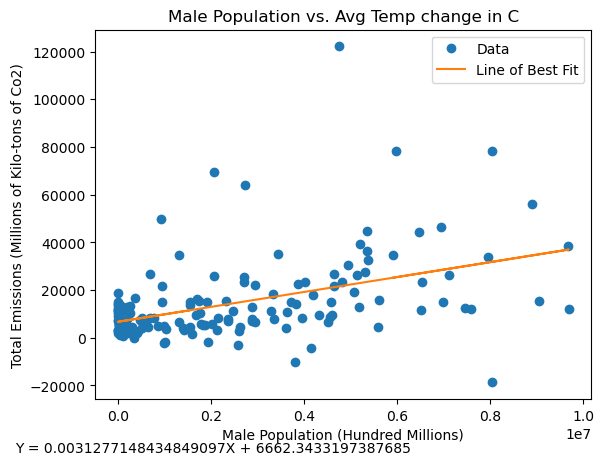

rvalue = 0.463951141999583
pvalue = 7.829908452597946e-11


In [41]:
x = df_by_country_2['Total Population - Male']
y = df_by_country_2['Total Emissions']
xlabel = 'Male Population (Hundred Millions)'
ylabel = 'Total Emissions (Millions of Kilo-tons of Co2)'
chart_title = 'Male Population vs. Avg Temp change in C'

regress(x, y, xlabel, ylabel, chart_title)

In [53]:
#Check Datasets for normality before applying anova tests
alpha = 0.05

normal_male = normaltest(df_by_country_2['Total Population - Male']).pvalue
normal_female = normaltest(df_by_country_2['Total Population - Female']).pvalue

print('Male:')
if normal_male > alpha : print('Reject the Ho that the data is Normally Distributed')
else: print('Fail to reject the Ho that the data is Normally Distributed')

print('\nFemale:')
if normal_female > alpha : print('Reject the Ho that the data is Normally Distributed')
else: print('Fail to reject the Ho that the data is Normally Distributed')

Male:
Fail to reject the Ho that the data is Normally Distributed

Female:
Fail to reject the Ho that the data is Normally Distributed


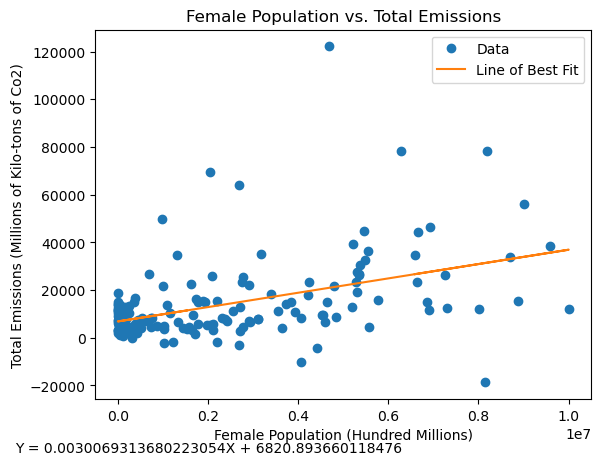

rvalue = 0.4576101628564279
pvalue = 1.5183312647759363e-10


In [ ]:
x = df_by_country_2['Total Population - Female']
y = df_by_country_2['Total Emissions']
xlabel = 'Female Population (Hundred Millions)'
ylabel = 'Total Emissions (Millions of Kilo-tons of Co2)'
chart_title = 'Female Population vs. Total Emissions'

regress(x, y, xlabel, ylabel, chart_title)

In [49]:


male_female_anova = f_oneway(df_by_country_2['Total Population - Male']
                             ,df_by_country_2['Total Population - Female'])

print(male_female_anova.statistic)
print(male_female_anova.pvalue)

0.016329229029001874
0.8983914024055244
